## REFL Assignment 1
Vinodh Chincholi, MDS202252

Question 1(ii) Value Search for 687 gridworld problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## This class specifies the environment (S, A, p, dR, d0, gamma)

class gridWorld:
    def __init__(self):
        
        ## the state space is tuple (i,j) excluding (2,2) (3,2)
        self.S = [(i,j) for i in range(5) for j in range(5) 
                  if not((i==2 and j==2) or (i==3 and j==2))]
        
        ## the set of actions are up, down, left, right
        ## these can be conviniently written as tuples which when added to state s 
        ## return the new state. Actions in order up, down, left, right (& stay at s)
        self.A = {'u':(-1,0), 'd':(1,0), 'l':(0,-1), 'r':(0,1), 's':(0,0)}
        
        ## The initial state for each episode is constant
        self.s = (0,0)
        
        ## Decay parameter as defined
        self.gamma = 0.9
        
        self.reward = 0
        
        
    def getNewState(self, a):
        
        oldState = self.s
        
        ## Sample action according to 0.8, 0.05, 0.05, 0.1 rule given in question
        if a in ['u', 'd']:
            a = np.random.choice([a, 'l', 'r', 's'], 1, [0.8, 0.05, 0.05, 0.1])[0]
        elif a in ['l', 'r']:
            a = np.random.choice([a, 'u', 'd', 's'], 1, [0.8, 0.05, 0.05, 0.1])[0]
        
        ## Convert from string action to tuple
        a = self.A[a]
        
        ## Take the action a
        candState = tuple(map(sum, zip(self.s, a)))
        
        ## Return same state if a is taking agent out of gridWorld
        if candState not in self.S:
            # print(f'Cannot go {candState} from {oldState}')
            self.reward = 0
            return
        
        ## Else return new state
        self.s = candState
        
        ## Once the move is made, update rewards
        if self.s == (4,2):
            self.reward = -10

        elif self.s == (4,4):
            self.reward = 10
            
        else:
            self.reward = 0
        
        # print(f'{oldState} --> {self.s}\n Reward: {self.reward}')
        return

In [3]:
def eval_policy(policy, tot_eps):
    G_list = []
    for _ in range(tot_eps):
        agent = gridWorld()
        state = agent.s
        moves = 0
        
        terminal = False
        G = 0
        while not(terminal):

            action = policy[state]
            
            agent.getNewState(action)
            G = agent.reward + agent.gamma*G
            state = agent.s
            moves += 1
            
            if state == (4,4):
                terminal = True
                
            if moves > 10000:
                break
            
        G_list.append(G)
    
    return (np.mean(G_list), np.std(G_list))

In [4]:
state_set = [(i,j) for i in range(5) for j in range(5) 
                  if not((i==2 and j==2) or (i==3 and j==2))]

action_map = {'up':(-1,0), 'down':(1,0), 'left':(0,-1), 'right':(0,1), 'stay':(0,0)}

gamma = 0.9

values = np.random.normal(0, 1, (5,5))
values2 = np.random.normal(0, 1, (5,5))
action = np.zeros((5,5))
action2 = np.zeros((5,5))

In [5]:
def reward(state):
    if state == (4,2):
        return -10
    elif state == (4,4):
        return 10
    else:
        return 0
    
def is_legal(state, action):
    candState = tuple(map(sum, zip(state, action)))
    if candState in state_set:
        return True
    else:
        return False
    
def summation(state, action):
    
    output = 0
    
    if state == (4,4):
        return output
    
    if action in ['up', 'down']:
        weight = {action:0.8, 'left':0.05, 'right':0.05, 'stay':0.1}
    elif action in ['left', 'right']:
        weight = {action:0.8, 'up':0.05, 'down':0.05, 'stay':0.1}
        
    for a in weight:
        a_tup = action_map[a]
        candState = tuple(map(sum, zip(state, a_tup)))
        if candState in state_set:
            output += weight[a]*(reward(candState) + gamma*values[candState])
            
    return output

In [6]:
f = False
count = 0
G_list = []
while True:
    count = count + 1
    
    for state in state_set:
        all_actions = [summation(state, action) for action in ['up', 'down', 'left', 'right']]
        action[state] = np.argmax(all_actions)
        values2[state] = max(all_actions)

    if ((values - values2)**2).sum() < 0.001:
            f = True
            break
    values = values2.copy()

In [7]:
values

array([[3.10316347, 3.69898872, 4.30564802, 5.13719292, 5.2454768 ],
       [3.63676287, 4.21401327, 4.87780397, 5.89597008, 6.3086474 ],
       [3.05782409, 3.48371784, 0.38590427, 6.75271403, 7.60493531],
       [2.55249206, 2.87823667, 0.06535657, 8.05937344, 9.18974916],
       [2.10663713, 2.12699913, 6.17210901, 9.18974916, 0.        ]])

In [8]:
action2 = [['_' for i in range(5)] for j in range(5)]
actions = ['u', 'd', 'l', 'r']

for state in state_set:
    i,j = state[0],state[1]
    action2[i][j] = actions[int(action[i,j])]
    
action2[4][4] = '_'

In [9]:
action2 = np.array(action2)
action2

array([['r', 'd', 'r', 'd', 'd'],
       ['r', 'r', 'r', 'd', 'd'],
       ['r', 'u', '_', 'd', 'd'],
       ['u', 'u', '_', 'r', 'd'],
       ['u', 'u', 'r', 'r', '_']], dtype='<U1')

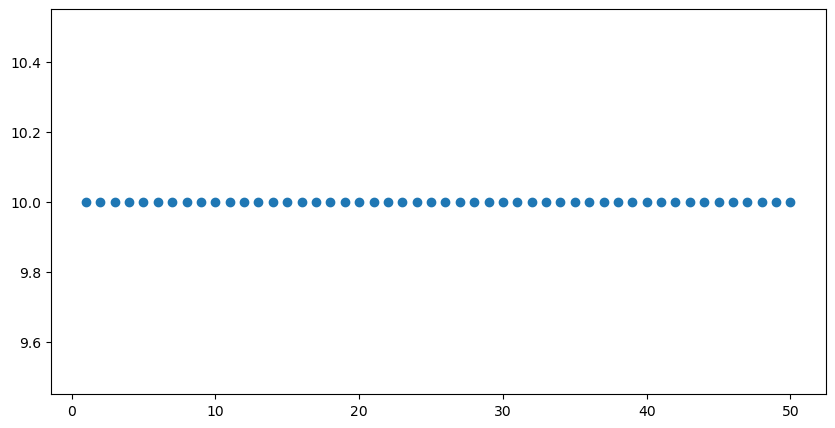

In [10]:
perf = [eval_policy(action2, 50) for _ in range(50)]
trial = [j+1 for j in range(len(perf))]
mean, std = [tup[0] for tup in perf], [tup[1] for tup in perf]

fig = plt.figure(figsize=(10,5))
plt.errorbar(x=trial, y=mean,
             yerr=std, fmt='o')
plt.show()

The total number of iterations for convergence is given by 'count' = 17 here

In [11]:
count

17